In [1]:
# Monte Carlo Interpretation

In [3]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('../src/')
from reRoute_Dynamics import Object_Params as op
df = pd.read_pickle('./KC_Example_Data/MC_Saves/1_0.pk')

In [ ]:
def convert_to_single_col(df, col):
    l = list(df.apply(lambda x: dict(zip([str(x.name)+" "+i for i in [str(n) for n in list(x[col].keys())]], x[col].values())), axis=1))
    d = {k:v for x in l for k,v in x.items()}
    return pd.Series(d).reset_index(drop=True)

In [22]:
def load_single_trip(trip_path):
    df=pd.read_pickle(trip_path)
    df['BP'] = df['BP'].apply(lambda x: x.to_dict())
    
    mi_kwh_m = (df['miles']/df['kwh']).mean()
    mi_kwh_s = (df['miles']/df['kwh']).std()
    mi_kwh_min = (df['miles']/df['kwh']).min()
    mi_kwh_max = (df['miles']/df['kwh']).max()
    time_m = df['tot_time'].mean()
    time_sd = df['tot_time'].std()
    time_min = df['tot_time'].min()
    time_max = df['tot_time'].max()
    

    fig, ax = plt.subplots(1, 1)
    #volt_bins = np.arange(-30, 100, 5)
    v = convert_to_single_col(df, 'BP')
    t = convert_to_single_col(df, 'dt')
    g = convert_to_single_col(df, 'g')
    vel = convert_to_single_col(df, 'vel')
    pvals, pbins, pbcon = ax.hist(v, weights=t, density=True)
    #ax.set_ylim(0, .2)
    ax.set_xlabel("Power [W]")
    ax.grid()
    plt.close()

    fig, ax = plt.subplots(1, 1)
    volt_bins = np.arange(30, 50, 1)
    v = convert_to_single_col(df, 'v')
    t = convert_to_single_col(df, 'dt')
    vvals, vbins, vbcon = ax.hist(v, weights=t, density=True)
    #ax.set_ylim(0, .2)
    ax.set_xlabel("Voltage [V]")
    ax.grid()
    plt.close()
    
    return {'kwh':[mi_kwh_m, mi_kwh_s, mi_kwh_min, mi_kwh_max],
            'time':[time_m, time_sd,time_min, time_max],
            'grade':[g.mean(), g.std()],
            'vel':[vel.mean(), vel.std()],
            'BP':[pvals, pbins, pbcon],
            'v':[vvals, vbins, vbcon]}

In [23]:
def load_trip_statistics(savepath):
    files = os.listdir(savepath)
    unique_shorts = pd.Series(files).apply(lambda x: x.split('_')[0]).unique()
    sim_dict = {}
    for short in unique_shorts:
        print(short)
        simulations = [x for x in files if short + "_" in x]
        fig, ax = plt.subplots(1, 1)
        for simulation in simulations:
            sim_dict[simulation] = load_single_trip(savepath + simulation)
            v_hist = sim_dict[simulation]['v']
            print(v_hist[1][:-1])
            print(v_hist[0])
            ax.hist(v_hist[1][:-1], alpha=.2, weights=v_hist[0], density=True, bins=v_hist[1], histtype="bar")
        ax.set_xlabel("Voltage [V]")
        ax.set_title("Voltage Distribution For Route {}".format(short))
        ax.grid()
        plt.show()
    return pd.DataFrame(sim_dict).T


101
[36.62435123 37.13655218 37.64875313 38.16095408 38.67315503 39.18535599
 39.69755694 40.20975789 40.72195884 41.2341598 ]
[0.16267904 0.14083275 0.17615576 0.24347972 0.44157443 0.31520598
 0.13072786 0.21594545 0.10048575 0.02527199]
[36.62435123 37.13653745 37.64872368 38.16090991 38.67309614 39.18528237
 39.6974686  40.20965483 40.72184106 41.23402728]
[0.13282151 0.15316608 0.1581991  0.22145165 0.46017526 0.35076215
 0.12553673 0.22229668 0.09928661 0.02871909]
[36.62435123 37.13653745 37.64872368 38.16090991 38.67309614 39.18528237
 39.6974686  40.20965483 40.72184106 41.23402728]
[0.1627412  0.16601063 0.15198948 0.20878256 0.44341383 0.32674207
 0.12709748 0.23264719 0.10148359 0.03150682]
[36.62435123 37.13655525 37.64875926 38.16096328 38.6731673  39.18537132
 39.69757534 40.20977936 40.72198338 41.2341874 ]
[0.17180003 0.15937129 0.15961006 0.20363067 0.45648605 0.35906861
 0.11727361 0.19345726 0.10109631 0.03055314]


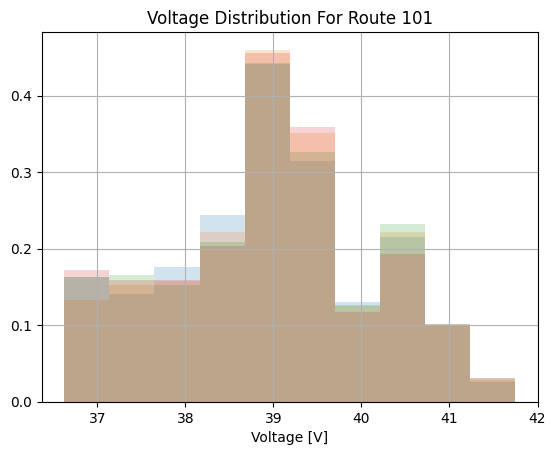

107
[36.62435123 37.12875063 37.63315004 38.13754945 38.64194886 39.14634827
 39.65074767 40.15514708 40.65954649 41.1639459 ]
[0.0404523  0.11801008 0.14791954 0.14927346 0.46101101 0.60186426
 0.13355596 0.23431585 0.08569322 0.01046018]


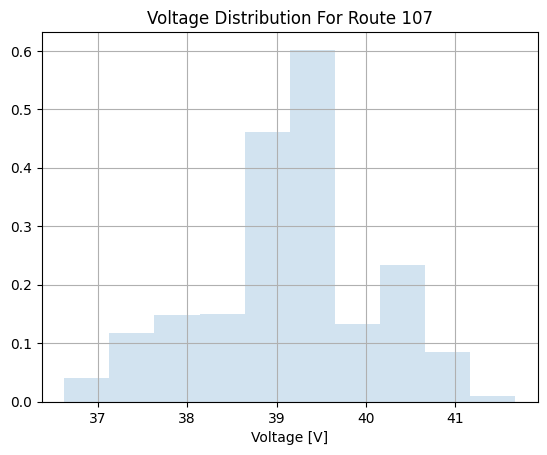

10
[36.62435123 37.12436989 37.62438854 38.1244072  38.62442586 39.12444452
 39.62446318 40.12448184 40.6245005  41.12451916]
[0.10475234 0.09756796 0.11370958 0.2449122  0.32243745 0.74461746
 0.09280417 0.19547922 0.07833753 0.00530747]
[36.62444415 37.12744593 37.6304477  38.13344948 38.63645126 39.13945303
 39.64245481 40.14545659 40.64845836 41.15146014]
[0.01063755 0.06891163 0.08845978 0.07515395 0.45709693 0.65164349
 0.22941011 0.3085462  0.09214513 0.00605979]
[36.62435123 37.12767726 37.6310033  38.13432933 38.63765537 39.14098141
 39.64430744 40.14763348 40.65095952 41.15428555]
[0.02656074 0.09325227 0.07853521 0.11454184 0.43580914 0.62940215
 0.20516911 0.31118967 0.08860129 0.00372237]
[36.62444415 37.12716431 37.62988447 38.13260463 38.63532478 39.13804494
 39.6407651  40.14348526 40.64620542 41.14892558]
[0.07240749 0.12260465 0.09830206 0.21061822 0.3886867  0.57437032
 0.15110913 0.27760255 0.09004875 0.00342836]


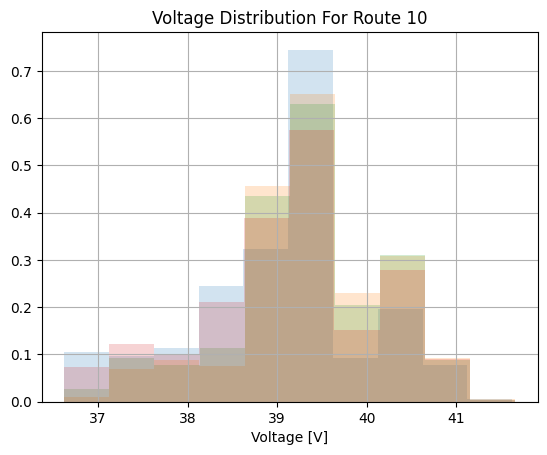

1
[36.62435123 37.13655218 37.64875313 38.16095408 38.67315503 39.18535599
 39.69755694 40.20975789 40.72195884 41.2341598 ]
[0.16267904 0.14083275 0.17615576 0.24347972 0.44157443 0.31520598
 0.13072786 0.21594545 0.10048575 0.02527199]
[36.62435123 37.13653745 37.64872368 38.16090991 38.67309614 39.18528237
 39.6974686  40.20965483 40.72184106 41.23402728]
[0.13282151 0.15316608 0.1581991  0.22145165 0.46017526 0.35076215
 0.12553673 0.22229668 0.09928661 0.02871909]
[36.62435123 37.13653745 37.64872368 38.16090991 38.67309614 39.18528237
 39.6974686  40.20965483 40.72184106 41.23402728]
[0.1627412  0.16601063 0.15198948 0.20878256 0.44341383 0.32674207
 0.12709748 0.23264719 0.10148359 0.03150682]
[36.62435123 37.13655525 37.64875926 38.16096328 38.6731673  39.18537132
 39.69757534 40.20977936 40.72198338 41.2341874 ]
[0.17180003 0.15937129 0.15961006 0.20363067 0.45648605 0.35906861
 0.11727361 0.19345726 0.10109631 0.03055314]
[36.62435123 37.12712379 37.62989635 38.13266891 38.63

In [ ]:
load_trip_statistics('./KC_Example_Data/MC_Saves/')


In [63]:
XDE60_ESS = op.ESS(motor_eff = .93, # @Gallet. No clear source on where these drivetrain, inverter, and motor efficiencies came from. Can't find TB200 specs yet.
                   inverter_eff = .88, # @Gallet
                   aux_eff = .89, # Assumption.
                   regen_eff = .54, # Assumption.
                   simple_load = 8000,
                   max_regen = -200000, #w, finally, some good sourcable values.@XDE35_Manual
                   module_struct = (12,8),
                   bus_struct = (16,40))


XDE60 = op.Bus(bus_mass = 20638, #kg, @NF_Xcelsior
               frontal_width = 2.6, #m,@NF_Xcelsior
               frontal_height = 3.38, #m, @NF_Xcelsior
               drag_coeff = .7, # Unitless. Many suspect papers cite .6, but best bet was one citing ORNL bus database saying .79, @Gao_Et_Al
               friction_coeff = .01, # unitless, otherwise known as rolling resistance. @Rolling_Resistance
               braking_accel = 1.5, #1.5m/s^2, handbrake required to stop from 20 mph, over no set distance. emergency brake must be capable of up to 6.5m/s^2 (20 mph over 20 ft).@APTA_Braking_Standards
               br_factor = .5, # driver braking aggression. Variable based on driver.
               i_factor = 1.1, # unitless, accounts for wheels, driveshaft, etc, cited from @Gallet
                               # however, there is no substantive explanation as to how it was calculated/obtained.
               max_dist = 304.8, # m, expected stopping distance for a bust from 60 mph calculated from google map offramp length measurements of I-5.
               max_acc = .4, # m/s^2, chosen due to it being a decent extension of existing drive cycle. subject to change.
               max_dt = .5, #s, timestep for that extension. 
               max_P = 300000 # W, @Siemens_Traction_Motor 
              )
    
XDE60_ESS.calc_voltage_simple(XDE60_ESS.calc_instance_power(68440000))

XDE40_ESS =  op.ESS(motor_eff = .93, # @Gallet. No clear source on where these drivetrain, inverter, and motor efficiencies came from. Can't find TB200 specs yet.
                   inverter_eff = .88, # @Gallet
                   aux_eff = .89, # Assumption.
                   regen_eff = .54, # Assumption.
                   simple_load = 8000,
                   max_regen = -200000, #w, finally, some good sourcable values.@XDE35_Manual
                   module_struct = (12,8),
                   bus_struct = (16,32)
                   
                   # W @Siemens_Traction_Motor
                  )

XDE35_ESS =  op.ESS(motor_eff = .93, # @Gallet. No clear source on where these drivetrain, inverter, and motor efficiencies came from. Can't find TB200 specs yet.
                   inverter_eff = .88, # @Gallet
                   aux_eff = .89, # Assumption.
                   regen_eff = .54, # Assumption.
                   simple_load = 8000,
                   max_regen = -200000, #w, finally, some good sourcable values.@XDE35_Manual
                   module_struct = (12,8),
                   bus_struct = (16,32)
                   
                   # W @Siemens_Traction_Motor
                  )



In [27]:
import ast
import random
def optimizefunc(func, ranges):
    '''
    optimizefunc takes a function with n parameters, and a set of n ranges for each parameter,
    and attempts to minimize the return value of the function. 
    '''
    # Set seed for optimization randomization
    random.seed(42)
    
    # Max iterations is 30
    max_iterations=1000
    iterations = 0
    
    rep_iterations = 0
    # Get number of dimensions for hyper-triangle
    ndim = 1+ len(ranges)
    
    # Dictionary for the points
    point_dict = {}
    lowest_max = (9999, 0)
    # render the first point set, this could be done with multiprocessing
    for i in range(ndim):
        args = []
        for j in range(len(ranges)):
            #print(ranges[j])
            arg = random.uniform(*ranges[j])
            args.append(arg)
        result = func(*tuple(args))
        point_dict[str(args)]=result

    # Loop the number of times specified
    while iterations < max_iterations:
        
        print("Evaluating literals...", end='\r')
        
        # get the furthest point's parameters
        furthest_pt = ast.literal_eval(max(point_dict, key=point_dict.get))
        furthest_val = point_dict[max(point_dict, key=point_dict.get)]
        
        # Check if the lowest max value is higher than the current
        if furthest_val < lowest_max[0]:
            lowest_max = (furthest_val, furthest_pt)

        # remove it from the dict
        del point_dict[max(point_dict, key=point_dict.get)]
        
        print("Loading hyperplane params...", end='\r')
        # get the vectors for the hyperplane
        hyperplane_vectors = list(point_dict.keys())
        
        # Convert them to actual vectors
        for i in range(len(hyperplane_vectors)):
            hyperplane_vectors[i] = ast.literal_eval(hyperplane_vectors[i])
        
        print("Calculating hyperplane...", end='\r')
        # get the hyperplane equation
        hyperplane_eqn = np.linalg.solve(hyperplane_vectors, [-1]*len(hyperplane_vectors))
        
        print("Evaluating hyperplane normal...", end='\r')
        # get the hyperplane normal
        hyperplane_normal_len = np.sqrt(sum(np.square(hyperplane_eqn)))
        
        # get the normalized hyperplane vector
        normalized_vector = hyperplane_eqn/hyperplane_normal_len
        
        print("Calculating Mirror Point...", end='\r')
        # Get the sign distance for the furthest point
        signdist = sum(normalized_vector*furthest_pt)
        
        # Get the mirrored version of that point
        mirrorpt = furthest_pt -2*normalized_vector*signdist
        
        mirrorpt = ensure_in_range(mirrorpt, ranges)
        
        print("Calculating Centroid...", end='\r')
        # Calculate the centroid of the hyperplane and mirror
        centroid = (sum([np.asarray(ls) for ls in hyperplane_vectors]) + mirrorpt)/(len(hyperplane_vectors)+1)
        centroid = ensure_in_range(centroid, ranges)
        
        print("Running Mirror Point...", end='\r')
        # run the function with the mirror and the centroid
        mir = func(*mirrorpt)
        print("Running Centroid Point...", end='\r')
        cent = func(*centroid)
        
        # if the mirror result is lower than the centroid, keep it
        if mir < cent:
            point_dict[str(mirrorpt.tolist())] = mir
            
        # otherwise, keep the centroid result
        else:
            point_dict[str(centroid.tolist())] = cent
        
        if point_dict[max(point_dict, key=point_dict.get)] == furthest_val:
            rep_iterations += 1
        
        if rep_iterations > 2: 
            closest_key = min(point_dict, key=point_dict.get)
            closest_val = point_dict[closest_key]
            point_dict = {}
            point_dict[closest_key] = closest_val
            for i in range(ndim-1):
                args = []
                for j in range(len(ranges)):
                    #print(ranges[j])
                    arg = random.uniform(*ranges[j])
                    args.append(arg)
                result = func(*tuple(args))
                point_dict[str(args)]=result
            rep_iterations = 0
        # update iterations. 
        #print(iterations, point_dict[min(point_dict, key=point_dict.get)], point_dict[max(point_dict, key=point_dict.get)])
        iterations+=1
    
    # return the lowest value parameter set found. 
    print(lowest_max)
    return min(point_dict, key=point_dict.get), point_dict[min(point_dict, key=point_dict.get)]

def ensure_in_range(point, point_bounds):
    '''
    verifies that a point in n dimensions lies within the n bounds [(min, max) * n],
    and if it isnt, set the point to be within the bounds.
    '''
    for i in range(len(point)):
        param_bounds = point_bounds[i]
        if point[i] < min(param_bounds):
            point[i] = min(param_bounds)
        elif point[i]> max(param_bounds):
            point[i] = max(param_bounds)
        else:
            point[i]=point[i]
    return point

In [41]:
from reRoute_Dynamics import Physics_Engine as pe

def buspower_brake(ve, dx, g, b, wb, ws):
    return (XDE60_ESS.calc_voltage_simple(XDE60_ESS.calc_instance_power(
             pe.brake(ve,
                     XDE60.mass,
                     dx,
                     pe.calculate_grade_force(g, XDE60.mass, XDE60.Cf),
                     pe.calculate_wind_force(b, ve, wb, ws, drag_coeff = XDE60.Cd, frontal_area = XDE60.area),
                     XDE60.a_br,
                     XDE60.f_br,
                     XDE60.f_i,
                     XDE60.dmax)['P'])))

def buspower_accel(ve, dx, g, b, wb, ws):
    return (XDE60_ESS.calc_voltage_simple(XDE60_ESS.calc_instance_power(
             pe.accelerate(ve,
                     XDE60.mass,
                     dx,
                     pe.calculate_grade_force(g, XDE60.mass, XDE60.Cf),
                     pe.calculate_wind_force(b, ve, wb, ws, drag_coeff = XDE60.Cd, frontal_area = XDE60.area),
                     braking_acceleration = XDE60.a_br,
                     braking_factor = XDE60.f_br,
                     inertial_factor = XDE60.f_i,
                     max_timestep = XDE60.dt_max,
                     max_power = XDE60.P_max)['P'])))

def buspower_maintain(ve, dx, g, b, wb, ws):
    return (XDE60_ESS.calc_voltage_simple(XDE60_ESS.calc_instance_power(
             pe.maintain(ve,
                     XDE60.mass,
                     dx,
                     pe.calculate_grade_force(g, XDE60.mass, XDE60.Cf),
                     pe.calculate_wind_force(b, ve, wb, ws, drag_coeff = XDE60.Cd, frontal_area = XDE60.area),
                     braking_acceleration = XDE60.a_br,
                     braking_factor = XDE60.f_br,
                     inertial_factor = XDE60.f_i,
                     max_power = XDE60.P_max)['P'])))

In [47]:
optimizefunc(buspower_accel, [(-500, 500),(-20, 20),(-10, 10),(0, 360), (0, 360), (0, 15)])

C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:487: RuntimeWarning: invalid value encountered in sqrt
  v_f = np.sqrt(2*travel_distance*a + velocity**2)


C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a


C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid val

C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:487: RuntimeWarning: invalid value encountered in sqrt
  v_f = np.sqrt(2*travel_distance*a + velocity**2)


C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a
C:\Users\Sebastian\Documents\GitHub\reRoute_Dynamics\Examples\../src\reRoute_Dynamics\Physics_Engine.py:538: RuntimeWarning: invalid value encountered in sqrt
  i_dt = (-v_f + np.sqrt(v_f**2 + 2*i_dx*step_a))/step_a


(np.float64(36.94637861003723), [139.4267984578837, -18.99956979109332, -4.499413632617615, 80.3558657335762, 265.1296370990445, 10.150492311343669])


('[430.8259047499531, 13.567051504464224, 2.999213685883632, 284.8970294935834, 49.5358515813138, 4.303190959699022]',
 np.float64(36.94637861003723))

In [102]:
load_single_trip('./KC_Example_Data/MC_Saves/1_0.pk')

{'kwh': [np.float64(0.3718645560766517),
  np.float64(0.07182303563537704),
  np.float64(0.23209010154487017),
  np.float64(0.6544297962466623)],
 'time': [np.float64(1950.571278046464),
  np.float64(457.78507290704687),
  np.float64(1050.4576334873573),
  np.float64(3437.4373364750145)],
 'grade': [np.float64(-0.6644217780518513), np.float64(3.8537393178248633)],
 'vel': [np.float64(7.871805505318005), np.float64(3.9765109471094187)],
 'BP': [array([1.91545118e-08, 4.33902329e-07, 3.21032692e-06, 1.14584608e-05,
         7.13713887e-07, 3.96673044e-07, 8.22784116e-07, 6.96705433e-07,
         1.27393074e-07, 5.93430073e-08]),
  array([-179670.15704976, -123924.00265817,  -68177.84826658,
          -12431.693875  ,   43314.46051659,   99060.61490818,
          154806.76929977,  210552.92369136,  266299.07808295,
          322045.23247454,  377791.38686612]),
  <BarContainer object of 10 artists>],
 'v': [array([0.02360938, 0.15143933, 0.06293114, 0.10579587, 0.41463091,
         0.6434

In [100]:
df['BP'].apply(lambda x: x.to_dict())

0      {0: nan, 1: 22805.341787578058, 2: -12475.1304...
1      {0: nan, 1: 18660.39796735334, 2: 117571.04659...
2      {0: nan, 1: 18029.17611600489, 2: -16807.42715...
3      {0: nan, 1: 22881.519423945087, 2: 121974.1477...
4      {0: nan, 1: 17849.616363439403, 2: 118374.8514...
                             ...                        
295    {0: nan, 1: 17548.935154282168, 2: -17678.6221...
296    {0: nan, 1: 16688.260996978795, 2: 115780.8893...
297    {0: nan, 1: 15389.16151102995, 2: 114875.57799...
298    {0: nan, 1: 20892.755379001268, 2: 119985.3837...
299    {0: nan, 1: 18218.374994176018, 2: 119073.9352...
Name: BP, Length: 300, dtype: object